# Assignment 1: Getting Started with NetworkX
## Spring 2023

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

## Part 1- Intro to NetworkX [20 points]
***
### Generating graphs with NetworkX 
### 1.1

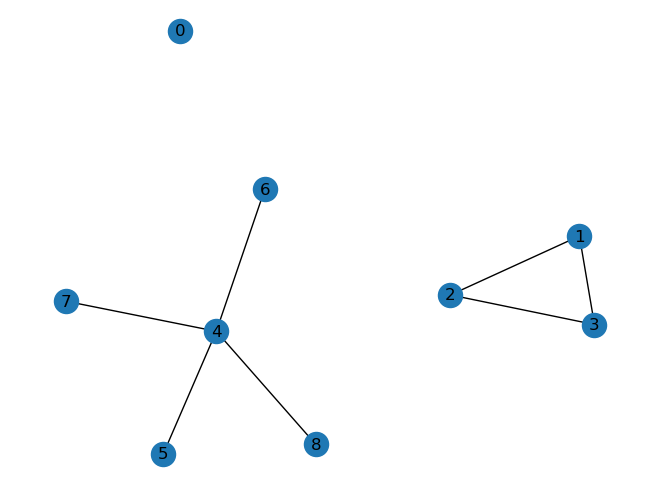

In [2]:
#Implement your code and show the visualization
e=[(4, 5), (4, 6), (4, 7),(4,8),(1,2),(2,3),(1,3)]

G=nx.Graph(e, size=5)
G.add_node(0)
nx.draw(G, pos=nx.spring_layout(G, k =1), with_labels = True)

### 1.2

In [3]:
#Implement your code here and write the answer in the Markdown cell right below
#(a) Cycle network:     leading eigenvalue
cycle = nx.cycle_graph(10)
m1 = nx.to_numpy_matrix(cycle)
w,v = np.linalg.eig(m1)
print("the leading eigenvalue for cycle network is", max(w))

the leading eigenvalue for cycle network is 2.0


In [17]:
#(b) Clique (complete) network: leading eigenvalue 
clique = nx.complete_graph(10)
m2 = nx.to_numpy_matrix(clique) 
w,v = np.linalg.eig(m2) 
print("the leading eigenvalue for clique network is ", round(max(w), 2))

the leading eigenvalue for clique network is  9.0


In [22]:
#(c) Star network: leading eigenvalue 
star = nx.star_graph(9)
m3 = nx.to_numpy_matrix(star)
w,v = np.linalg.eig(m3) 
print("the leading eigenvalue for star network is", round(max(w), 2))

the leading eigenvalue for star network is 3.0


Q: “What is the relationship between the eigenvalue of the adjacency matrix, the maximum degree, and average degree of each network?” Type your answer below.
***
average degree $\leq$ eigenvalue $\leq$ maximum degree           for the networks above.

reference:
The Adjacency Matrix and The nth Eigenvalue   by Daniel A. Spielman  ,   Spetember 5, 2012
http://www.cs.yale.edu/homes/spielman/561/2012/lect03-12.pdf

### Importing Map Data 
### 1.3

In [25]:
#Implement your code and write the answer in the Markdown cell right below
G = nx.read_graphml("cities_data.graphml")
#(a)
print("The number of nodes is ", len(list(G.nodes(data=True))))
#(b)
print("The number of edges is ",len(list(G.edges(data=True))))
#(c)
result = []
edges = list(G.edges(data=True))
for edge in edges:
    if (edge[-1]["weight"] < 50):
        result.append(edge)
print("The number of the pairs of cities less than 50 miles apart is ",len(result))


The number of nodes is  128
The number of edges is  8128
The number of the pairs of cities less than 50 miles apart is  8


(a) The number of nodes is  128
(b) The number of edges is  8128
(c)  The number of the pairs of cities less than 50 miles apart is  8

### 1.4

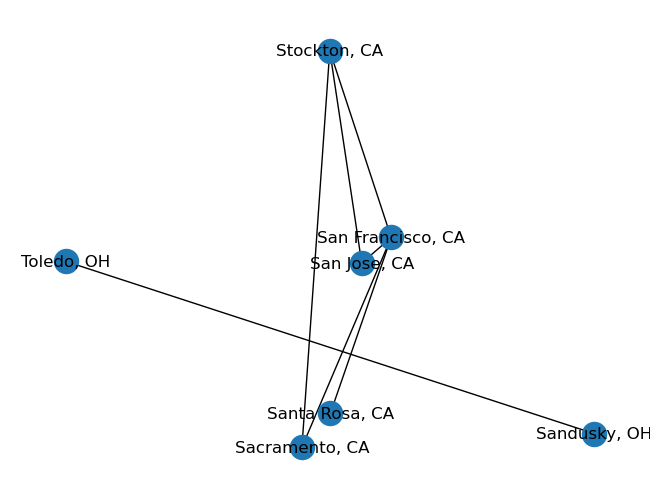

In [55]:
#Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list):
    '''
    Input
    G: graph
    city_list: list of strings (names of cities in G)

    Output
    S: subgraph of G that only contains edges between cities in “city_list” 
    and directly neighboring cities that are less than 100 miles away
    '''
    S = nx.Graph()
    edges = list(G.edges(data=True))
    for edge in edges:
        if (edge[-1]["weight"] < 100 and (edge[0] in city_list or edge[1] in city_list)):
            S.add_edge(edge[0], edge[1], weight=edge[2]["weight"])

    nx.draw(S, pos=nx.spring_layout(G, k =8), with_labels = True)
    
    return S

cities_within_100(G, [ "Toledo, OH", "Stockton, CA", "San Francisco, CA" ])


## Part 2 - Random Walks of Les Misérables [20 points]
### 2.1

In [56]:
H=nx.read_gml("lesmis_data.gml")
H.nodes
print(nx.is_connected(H))

True


The graph is connected and it can be determined by a NetworkX library function called "is_connected," which can be implemented by the Breadth First Search (BFS) algorithm. It starts at one node, and visits all nodes at the current depth level before going down to the nodes at the next depth level. Whenever a node is visited, it would be marked. If all nodes have been marked at the end, then we can know the graph is connected.


### 2.2

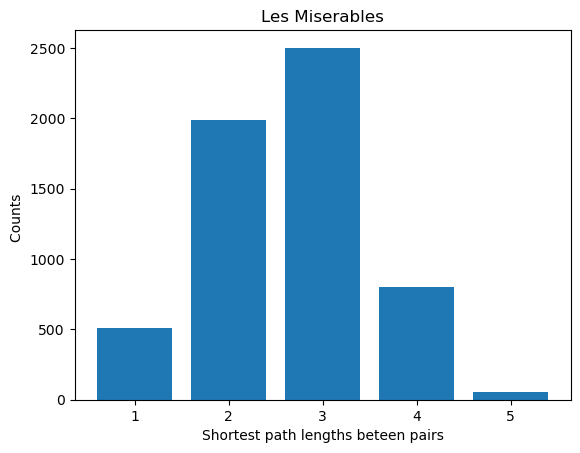

maximum:  5
average:  2.6411483253588517


In [58]:
pairs = []
s = dict(nx.shortest_path_length(H))
for src in s:
    for des in s[src]:
        if src != des:             
            pairs.append(s[src][des])
plt.bar(*np.unique(pairs, return_counts=True))
plt.title('Les Miserables')
plt.xlabel('Shortest path lengths beteen pairs')
plt.ylabel('Counts ')
plt.show()
m = max(pairs)

summation = 0
for p in pairs:
    summation+=p 
print ("maximum: ", m)
average = summation / len(pairs)
print ("average: ", average)



### 2.3

In [133]:
#Implement your code here and write the answer in the Markdown cell right below

# get the values from edges 
value = nx.get_edge_attributes(H, "value")

# build up the transition_matrix
matrix = []
for src in nodes:
    row = []
    s = 0
    for des in nodes:
        if (src, des) in value:
            s += value[(src, des)]
        elif (des, src) in value:
            s += value[(des, src)]
    for des in nodes:
        if (src, des) in value:
            row.append(value[(src, des)]/s)
        elif (des, src) in value:
            row.append(value[(des, src)]/s)
        else:
            row.append(0)
    matrix.append(row)

transition_matrix = np.array(matrix)

transition_matrix_transpose = transition_matrix.T

# Now get the stationary distribute from transition matrix

# First, we initialze them with equal probablity 
initial_q = np.array([1/len(nodes)]*len(nodes))
q = np.dot(transition_matrix_transpose, initial_q)
# We simulate random walks 300 times to get stationary distribution
for i in range(300):
    q = np.dot(transition_matrix_transpose, q)

print("")    
print("the most commonly mentioned characters are: ")
print(sorted(zip(q, nodes), reverse=True)[:3])




the most commonly mentioned characters are: 
[(0.09634146341482853, 'Valjean'), (0.06341463414508845, 'Marius'), (0.05548780487574909, 'Enjolras')]


From the stationary distribution, we find the three most commnly mentioned characters are 'Valjean', 'Marius' and 'Enjolras'.



### 2.4
Q: What’s another practical scenario, (not covered in the lectures) where finding the stationary distribution of a network could be useful? Explain the graph structure of your example (i.e. characters are nodes, edges are mutually occurrences, weights are number of occurrences ) and what information you obtain (i.e. the most popular character). 
Type your answer below.
***

For a chef, he may prepare for all kinds of ingredients to cook food. Ingredients can be the nodes for the graph. If two ingredients appear in a recipe, it can form a edge. Edge's weight can be how many times to have two ingredients appear in a same recipe. After we build up the stationary distribution, we will know the most popular ingredients he need, and he can prepare for the amount of ingredients he need according to the probability of a ingredient to appear in a recipe.   

## Part 3 - Components of Drosophila Optic Medulla [20 points]

### 3.1

In [59]:
# Load the graph
G = nx.read_graphml("drosophila_medulla_data.graphml")

In [61]:
# Implement your code and write the answers in the Markdown cell right below
wc =[]
[wc.append(len(c)) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]
print("The numbers of the nodes in the weakly connected components are: ", wc)
total = 0
for c in wc:
    total += c
print("The percentage of the nodes in the largest weakly connected component is :", round(wc[0]/total*100, 2), "%")

The numbers of the nodes in the weakly connected components are:  [1770, 3, 2, 2, 2, 2]
The percentage of the nodes in the largest weakly connected component is : 99.38 %


There are 6 weakly connected components. The percentage of the nodes 
in the largest weakly connected component is : 99.38 %

### 3.2

In [65]:
#Implement your code and write the answer in the Markdown cell right below
wc =[]
[wc.append(len(c)) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
print("The numbers of the strongly connected components are:  ", len(wc))
total = 0
for c in wc:
    total += c
print("The percentage of the nodes in the largest weakly connected component is :", round(wc[0]/total*100, 2), "%")

The numbers of the strongly connected components are:   996
The percentage of the nodes in the largest weakly connected component is : 44.08 %


There are 996 strongly connected components. The percentage of the nodes in the largest strongly connected component is 44.08%

### 3.3

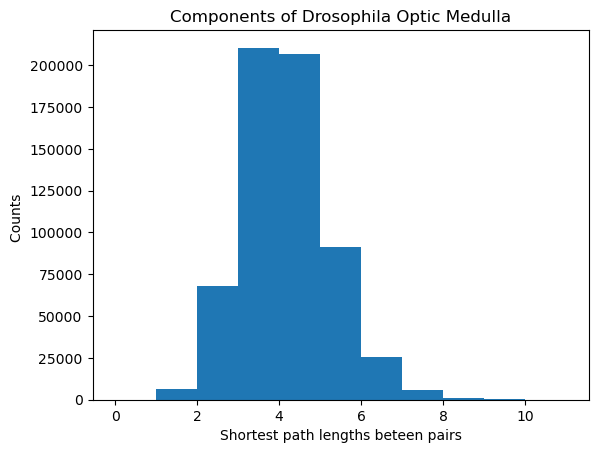

average:  3.6696054855063043
maximum:  10


In [67]:
#Implement your code and show the distribution
largest_cc = max(nx.strongly_connected_components(G), key=len)
pairs = []

for src in largest_cc:
    for des in largest_cc:
        if( src != des):
            length = nx.shortest_path_length(G, source = src, target=des)
            pairs.append(length)
plt.hist(pairs, bins = [0,1,2,3,4,5,6,7,8,9,10,11])
plt.title('Components of Drosophila Optic Medulla')
plt.xlabel('Shortest path lengths beteen pairs')
plt.ylabel('Counts ')
plt.show()
print("average: ", sum(pairs)/len(pairs))
print("maximum: ", max(pairs))


The average shortest path length in the largest SCC is 3.6696.  The max shortest path length of the largest SCC is 10. The distriubtion has higher average and higher maximum compared to the undirected data set in part 2. It is harder to find a feasible path between nodes for directed edges.



### 3.4
Q: What is one way in which knowing the distribution of shortest path lengths for a network could be useful?
Type your answer below. 
***
Some of social media such as Twitter have followers feature. A user can follow another user whom he or she is interested in. The directed graph can built up with users as nodes, and follower-followee as directed edges. A shortest path length can represent as how close the relationship between two users have. It may be useful for some companies to do research to see what idols or products some users may like and take advantage of it.

## Part 4 - Topologically Ordered Languages [20 points]
### 4.1

In [80]:
#Implement your code and write the answer in the Markdown cell right below
G = nx.read_edgelist("language_data.txt",create_using=nx.DiGraph(), nodetype = str)
# nx.is_directed_acyclic_graph(G)

It is not a DAG. We check with a library function "is_directed_acyclic_graph" and it return false, so we know it is not DAG. The graph contains at least a "cycle" since we have already parsed the data set to a is_directed_acyclic_graphdirected graph.


### 4.2

In [94]:
#Implement your code and write the answer in the Markdown cell right below
nx.find_cycle(G)
G.remove_edge('dylan', 'eulisp')
nx.find_cycle(G)
G.remove_edge('clean', 'haskell')
nx.find_cycle(G)

We first removed the edge('dylan', 'eulisp'), then remove the edge('clean', 'haskell')


### 4.3

In [90]:
#Implement your code and write the answer in the Markdown cell right below
reverse_topological_order = list(reversed(list(nx.topological_sort(G))))
number_of_source_language = 0
max = 0
max_node = ""
for node in reverse_topological_order:
    if G.out_degree(node) == 0:
        number_of_source_language += 1
        if len(nx.ancestors(G, node)) > max:
            max = len(nx.ancestors(G, node))
            max_node = node
print("the number of source languages is:", number_of_source_language)
print("the source language had the highest influence is : ", max_node)

the number of source languages is: 48
the source language had the highest influence is :  speedcoding


(a) There are 48 source languages. <br>
(b)"speedcoding" had the highest influence.


### 4.4
Q: What’s another real world example of a DAG (not covered in the lectures)? Explain how your chosen example meets the definition. Type your answer below.
***
In order to learn some knowledge, some prerequisite knowledge may be required. For example, to learn Network Science, linear algebra knowledge may be required. So we can choose all kinds of knowledge as nodes, and the prerequisite knowledge of a chosen knowledge and the chosen knowledge can form an directed edge. We can then build up a DAG. we can then find the topological order to learn a series of knowledges. And we can know which knowledge should be learned first.  

## Part 5 - Bipartite Projects of Github
### 5.0

In [91]:
# First, parse data to pandas dataframe, then modity the node names with prefix.

col_name = ['user', 'project']
df = pd.read_csv('github_data.txt', names=col_name, delim_whitespace=True, header=None)
df['user'] = 'user' + df['user'].astype(str)
df['project'] = 'project' + df['project'].astype(str)

# Read the data from the pandas to create bilpartite graph
G = nx.from_pandas_edgelist(df, "user", "project")

B = nx.Graph()
B.add_nodes_from(df['user'], bipartite=0)
B.add_nodes_from(df['project'], bipartite=1)
B.add_edges_from(G.edges)

top = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom = set(B) - top

users = list(top)
projects = list(bottom)

#create biadjacency_matrix and its transpose
matrix = nx.bipartite.biadjacency_matrix(B, users, projects)
matrix_t = matrix.transpose()

# build up user_matrix and project_matrix
user_matrix = matrix @ matrix_t
project_matrix = matrix_t @ matrix
user_matrix.setdiag(0)
project_matrix.setdiag(0)




C:\Users\jack\AppData\Local\Temp\ipykernel_25576\964768686.py:23: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  matrix = nx.bipartite.biadjacency_matrix(B, users, projects)


### 5.1

In [92]:
#need to run ###5.0 code first to get user_matrix
user_pair = np.unravel_index(np.argmax(user_matrix), user_matrix.shape)
print("the pair of users is : ")
print(users[user_pair[0]])
print(users[user_pair[1]])

the pair of users is : 
user655
user325


The pair of users share the most github projects are 325 and 655.

### 5.2

In [93]:
#need to run ###5.0 code first to get project_matrix
project_pair = np.unravel_index(np.argmax(project_matrix), project_matrix.shape)
print("the pair of projects is : ")
print(projects[project_pair[0]])
print(projects[project_pair[1]])

the pair of projects is : 
project17
project299


The pair of projects share the most users are 17 and 299.

### 5.3

Q: What’s another practical scenario, (not covered in the lectures) where one-mode projections could be applied to a bipartite data set? Type your answer below.

Computer games and its players can be bipartite.  An edge between a player and a computer game indicates that the player plays that computer game. One mode-projection can represent the players projection, and computer games projection. Players projection can show how players play certain games together. And computer games projection can show how large two computer games have the same player base.